# Basic 2-dimensional ODE solution

In [1]:
# This is a standard initalisation code - no need to change this
# It loads basic fast array code, plot library and ODE solver
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
%config InlineBackend.figure_formats={'retina','png'}

## System definition

Solving parametric pendulum
$$
\ddot{x}+\gamma\dot{x}+\omega_0^2(1+h \cos(2t))x=0
$$

In [2]:
def f(t, X):
    x = X[0]
    y = X[1]
    return [ y,
             -gamma*y-w02*(1+h*np.cos(2*t))*np.sin(x) ]

## Simple solution

Let us just solve the equations for some initial conditions and plot the solution.

Note the message `'The solver successfully reached the end of the integration interval.'`. It is good to check that it is the case -- sometimes the solver fails to do this!

In [3]:
def hcrit(w02, gamma):
    return 2*np.sqrt((1-w02)**2+gamma**2/w02**2)

In [4]:
gamma=0.02
w02=1.0268**2
h=0.1
print(hcrit(w02,gamma))
tspan = (0, 540) # time range for the solution
x0 = [0.2, 0.0]  # initial conditions

#t_eval = np.linspace(tspan[0], tspan[1], num=500) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, rtol=1e-13, atol=1e-13)
#xs

0.11507071026993408


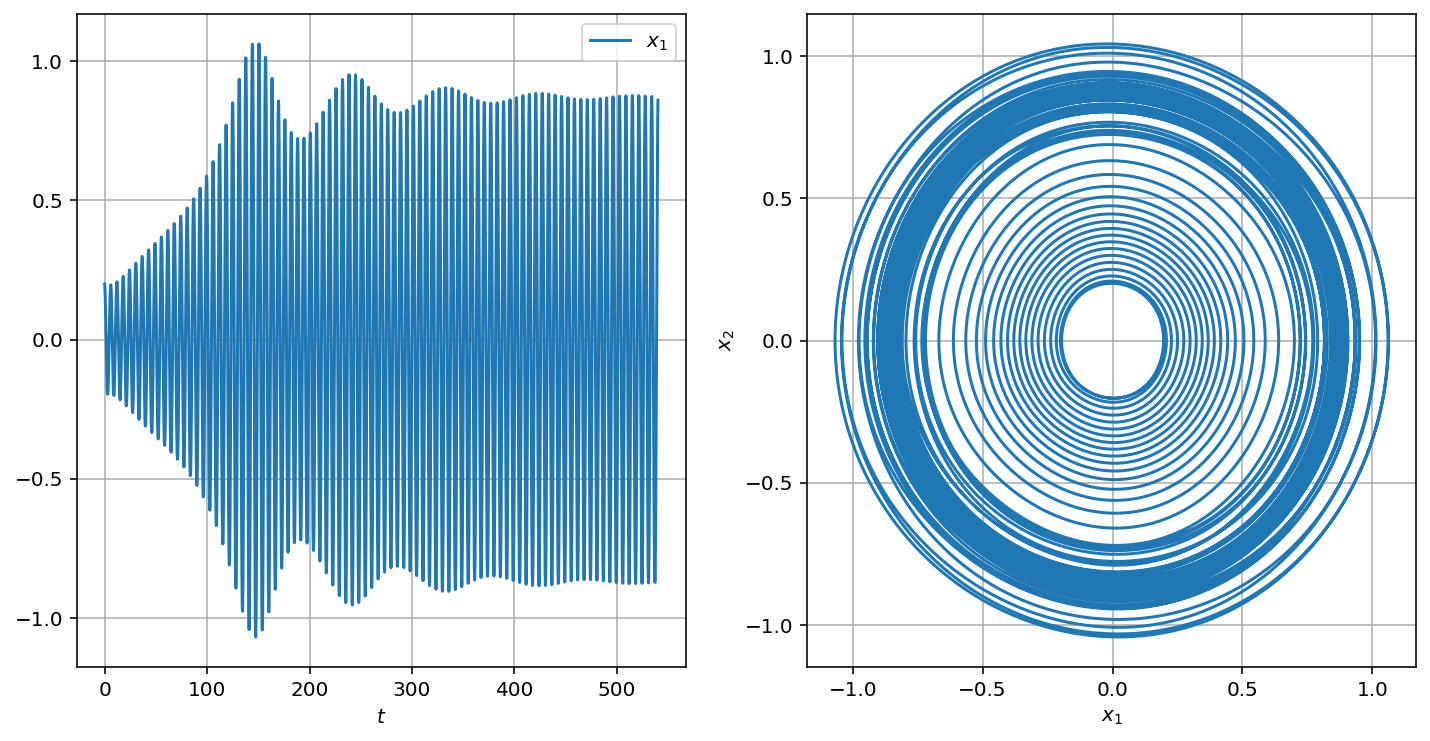

In [5]:
fig = plt.figure(figsize=(12,6))
ax1, ax2 = fig.subplots(1,2)

ax1.plot(xs.t, xs.y[0,:], label="$x_1$")
#ax1.plot(xs.t, xs.y[1,:], label="$x_2$")
#ax1.plot(xs.t, x0[0]*np.cos(np.sqrt(w02)*xs.t))
ax1.set_xlabel("$t$")
ax1.grid()
ax1.legend()

ax2.plot(xs.y[0,:], xs.y[1,:])
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.grid()